In [1]:
%pylab inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  #交叉验证
from sklearn.metrics import confusion_matrix

import xgboost as xgb
import pandas as pd
import numpy as np
import pickle
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [21]:
xgb.Booster

xgboost.core.Booster

In [2]:
disorder_R_H = pickle.load(open('/home/dldx/R-H/code/classification/ML/data/disorder/avg_R-H_all_dsiorder.pkl','rb'))

data1 = pd.read_csv('/home/dldx/R-H/code/classification/ML/data/disorder/MSA_disorder_R_H.csv')
input_lable = np.array(data1.Tier)

In [3]:
all_21_IDR_disorder = []
for position in range(21):
    one_IDR = []
    R_IDR = [i[position] for i in disorder_R_H[0]]
    H_IDR = [i[position] for i in disorder_R_H[1]]
 
    # 转化为二维数组
    for i in range(72):
        test =[]
        test.append(R_IDR[i])
        one_IDR.append(test)
    for i in range(107):
        test =[]
        test.append(H_IDR[i])
        one_IDR.append(test)

    # 所有IDR的平均disorder值添加到一个数组
    all_21_IDR_disorder.append(one_IDR)

In [4]:
# 将21个区域的平均disorder值一起作为特征
all_R_H_IDR_disorder =[]
all_R_H_IDR_disorder.extend(disorder_R_H[0])
all_R_H_IDR_disorder.extend(disorder_R_H[1])

In [11]:
# train_test_split 按比例划分原数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(all_R_H_IDR_disorder,input_lable,train_size=0.8,random_state = 13)
# 定义模型
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=8,random_state=0)
# 训练数据集
model = model.fit(Xtrain, Ytrain)

predict = model.predict(Xtest)
cm = confusion_matrix(Ytest,predict)
tn, tp, fn, fp = cm[0][0], cm[1][1], cm[1][0], cm[0][1]
n = tp + fp + tn + fn
accuracy = (tp + tn)/n 
mcc = ((tp*tn) - (fp*fn))/np.sqrt((tp+fp)*(tn+fn)*(tp+fn)*(tn+fp))
sens = tp/(tp + fn) * 100 if tp + fp != 0 else 0
spec = tn/(tn + fp) * 100 if tn + fn != 0 else 0
print("accuracy : " + str(accuracy))
print("mcc : " + str(mcc))
print("sens : " + str(sens))
print("spec : " + str(spec)) 

accuracy : 0.9444444444444444
mcc : 0.9574271077563381
sens : 85.71428571428571
spec : 100.0


In [12]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()

In [13]:
# 将可解释性中的特征对应上
ceate_feature_map(["IDR1","IDR2","IDR3","IDR4","IDR5","IDR6","IDR7","IDR8","IDR9","IDR10","IDR11","IDR12","IDR13","IDR14","IDR15",
            "IDR16","IDR17","IDR18","IDR19","IDR20","IDR21"])

In [5]:
# 最优模型进行可解释性

# train_test_split 按比例划分原数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(all_R_H_IDR_disorder,input_lable,train_size=0.8,random_state = 13)
# 定义模型
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=8,random_state=0)
# 训练数据集
model = model.fit(Xtrain, Ytrain)
# fig = xgb.plot_tree(model,num_trees=0,fmap='xgb.fmap')
# fig.get_figure().savefig("/home/dldx/R-H/code/classification/ML/plot/rmsf_fig/fig5_1_disorder.jpg",dpi=900)

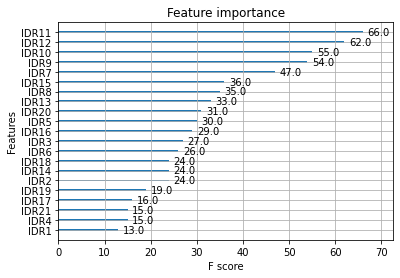

In [17]:
fig = xgb.plot_importance(model,fmap='xgb.fmap')
fig.get_figure().savefig("/home/dldx/R-H/code/classification/ML/plot/rmsf_fig/fig5_2_disorder.jpg",dpi=900)

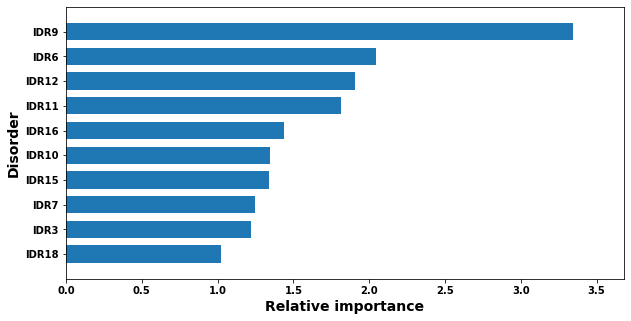

In [7]:
sns.set_context({'figure.figsize':[10, 5]})
fig = xgb.plot_importance(model,fmap='xgb.fmap',importance_type="gain",height=0.7,show_values = False,title='',grid=False,max_num_features=10)
xticks(weight='bold')
yticks(weight='bold')
xlabel('Relative importance',weight='bold',fontsize=14)
ylabel('Disorder',weight='bold',fontsize=14)
fig.get_figure().savefig("/home/dldx/R-H/code/classification/ML/plot/plot_importance/fig5_B_disorder.jpg",dpi=900)

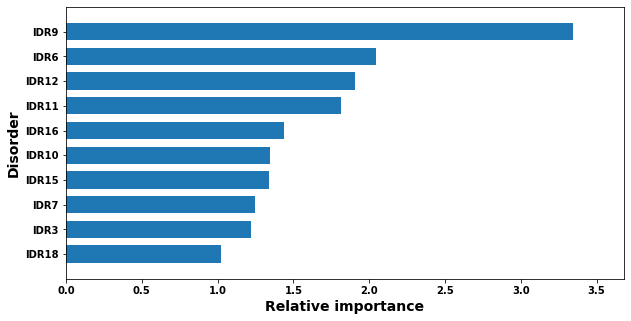

In [12]:
sns.set_context({'figure.figsize':[10, 5]})
fig = xgb.plot_importance(model,fmap='xgb.fmap',importance_type="gain",height=0.7,show_values = False,title='',grid=False,max_num_features=10)
xticks(weight='bold')
yticks(weight='bold')
xlabel('Relative importance',weight='bold',fontsize=14)
ylabel('Disorder',weight='bold',fontsize=14)
fig.get_figure().savefig("/home/dldx/R-H/code/classification/ML/plot/plot_importance/fig5_B_disorder.jpg",dpi=900)